X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)
Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4785 - accuracy: 0.8766 - lr: 1.0000e-04
Epoch 2/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2275 - accuracy: 0.9359 - lr: 1.1220e-04
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1708 - accuracy: 0.9510 - lr: 1.2589e-04
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1344 - accuracy: 0.9617 - lr: 1.4125e-04
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1085 - accuracy: 0.9692 - lr: 1.5849e-04
Epoch 6/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0900 - accuracy: 0.9735 - lr: 1.7783e-04
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0755 - accuracy: 0.9782 - lr: 1.9953e-04
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss:

1875/1875 [==============================] - 4s 2ms/step - loss: 2.3466 - accuracy: 0.1772 - lr: 0.2512
Epoch 70/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4466 - accuracy: 0.1428 - lr: 0.2818
Epoch 71/100
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3226 - accuracy: 0.1481 - lr: 0.3162
Epoch 72/100
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2821 - accuracy: 0.1408 - lr: 0.3548
Epoch 73/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2888 - accuracy: 0.1238 - lr: 0.3981
Epoch 74/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3332 - accuracy: 0.1210 - lr: 0.4467
Epoch 75/100
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3939 - accuracy: 0.1114 - lr: 0.5012
Epoch 76/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3588 - accuracy: 0.1088 - lr: 0.5623
Epoch 77/100
1875/1875 [==============================] - 4s 2ms/step - loss:

Text(0.5, 1.0, 'Learning rate vs Loss')

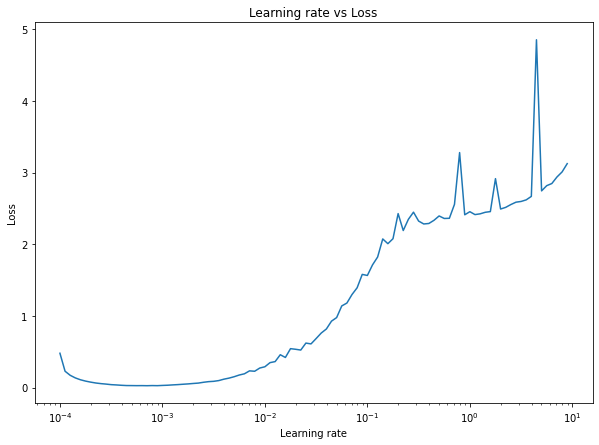

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)
print('X_test:', x_test.shape)
print('y_test:', y_test.shape)

model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

#model.summary()
#Learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

history = model.fit(x_train,
                    y_train, 
                    epochs=100,
                   callbacks =[lr_scheduler])
lrs = 1e-4*(10**(np.arange(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")
#model.evaluate(x_test, y_test)

